In [1]:
import os
import tarfile
import urllib

In [2]:
# Loading in the data
DOWNLOAD_ROOT = ("https://raw.githubusercontent.com/ageron/handson-ml2/master/")
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"    

# This function will create a new directory in our folder that contains the csv file of the data we will be using
def fetch_housing_data(housing_path=HOUSING_PATH, housing_url=HOUSING_URL):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
# Calling function 
fetch_housing_data()

In [4]:
# Readint the data as a DataFrame 
import pandas as pd

def load_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Getting a brief summary about the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Looking at the unique values in the "ocean proximity" column
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# Getting a numerical summary of the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


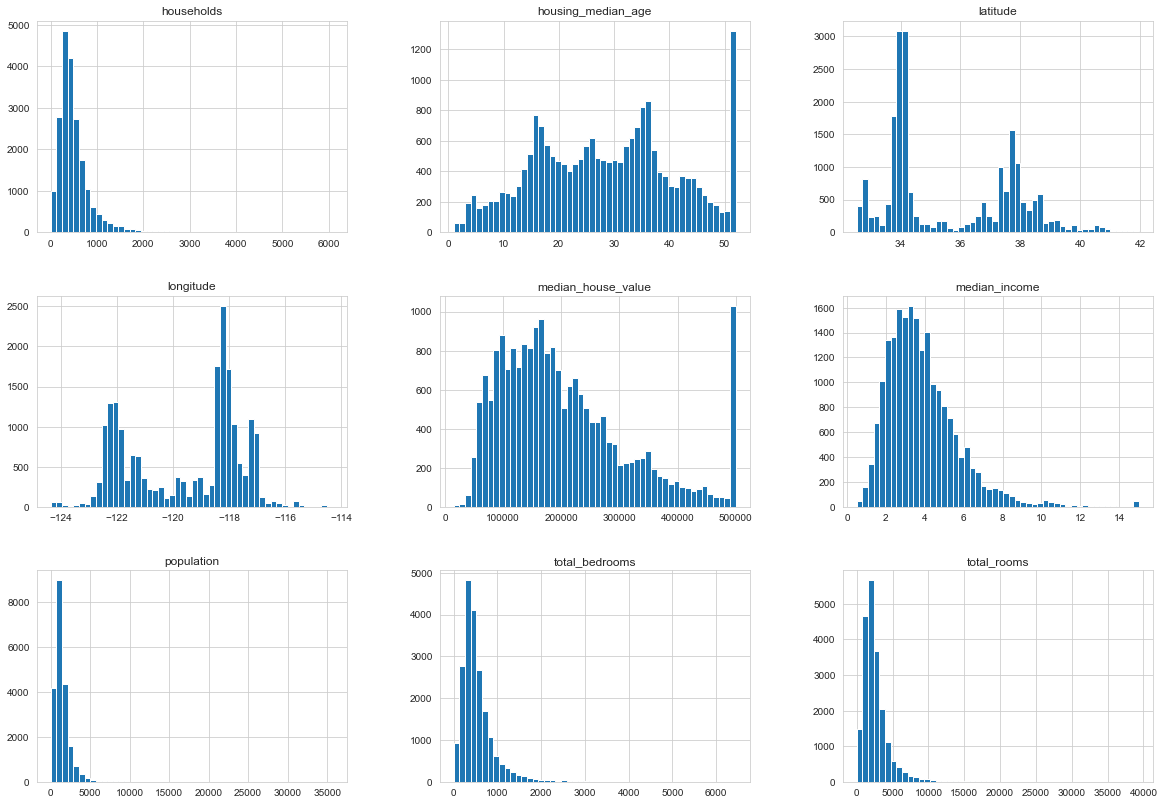

In [9]:
# Plotting a histogram to look at the distribution of values in each column
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
housing.hist(bins=50, figsize=(20, 14))
plt.show()

In [10]:
# Splitting the data in train and test sets
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(housing, test_size=.2, random_state=42)

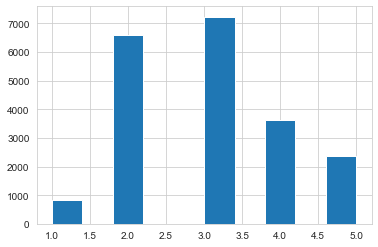

In [12]:
# Seperating the "median income column into 5 ranges"
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
plt.show()

In [13]:
# Stratified sampling based on income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(test_size=.2, n_splits=1, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
# Removing the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [16]:
# Creating a copy of the training set (an exploration set) so we can play around with it,
# and go a little more in-depth
housing = strat_train_set.copy()

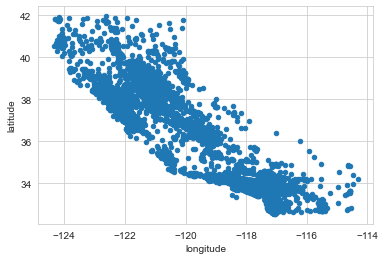

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

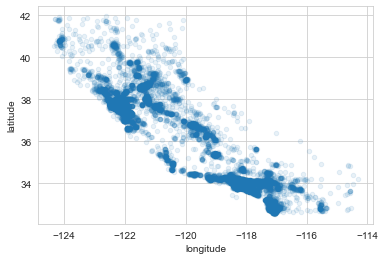

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)
plt.show()

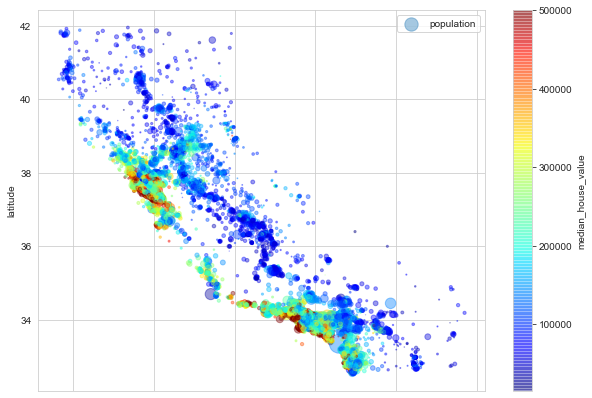

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing['population']/100, 
            label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'), 
            colorbar=True)
plt.legend()
plt.show()

In [20]:
# looking for correlations (standard correlation coefficient with pearson's r)
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

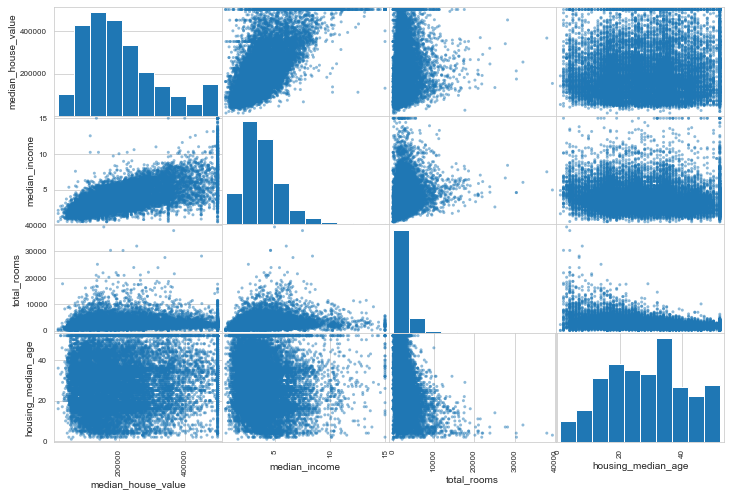

In [21]:
# Plotting a scatter matrix to see relationships between numerical variables
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

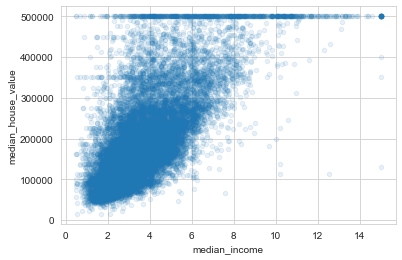

In [22]:
# Looking at the relationship between median_income and median_house_value columns
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1)
plt.show()

In [23]:
# Some attribute combinations to get more correlated values
housing['rooms_per_household'] = housing.total_rooms / housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.population / housing.households

In [24]:
# looking at the correlation matrix again with all the new combinations we made
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [25]:
# Preparing the data for our machine learning model by speerating the target from the predictor 
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [26]:
# Using sklearns SimpleImputer to impute missing values in the data with the 'median'
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [27]:
# since median can only be computed on numerical attributes, we need to create a copy of the data without the 
# ocean_proximity column which is a text attribute.
housing_num = housing.drop('ocean_proximity', axis=1)

In [28]:
# Fitting the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
# SimpleImputer stores the result in its statistics_ instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [30]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [31]:
# Transform the training set by replacing the missing values in the data with the learned medians
X = imputer.transform(housing_num)

In [32]:
# The result is a numpy arrray, so we have to put it back into a dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [33]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or *kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [40]:
# Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(housing_prepared, housing_labels, random_state=42)

In [44]:
# Creating a model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
# Using some data for training and testing the model
print(f'Predictions: {lin_reg.predict(X_val)}')
print(f'Labels: {list(y_val[:5])}')

Predictions: [216285.71734316 279916.36181805 236878.77901001 ... 159298.52172937
  72900.40242984 243969.83468366]
Labels: [284700.0, 259800.0, 133500.0, 191700.0, 239400.0]


In [46]:
# Using an error metric
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

68720.71589104731

In [47]:
# Trying out more powerful models
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

In [48]:
# Using K-Fold cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print("Standard Deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [69346.53078996 65399.10223332 71386.96648071 69540.46010111
 71069.68321728 74737.58119125 70752.46417928 70981.41418076
 75670.85280388 70715.81736417]
Mean: 70960.0872541729
Standard Deviation: 2688.8975386827337


In [52]:
# Seeing which model is better
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.6740017983484


In [55]:
# Using a Random Forest model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse = np.sqrt(-forest_scores)

forest_rmse

array([49232.13307374, 47425.77801637, 49855.82210312, 52573.98026149,
       49549.87268163, 53216.58279267, 49044.55141219, 47633.51945698,
       53078.49642538, 50244.07536202])

In [56]:
display_scores(forest_rmse)

Scores: [49232.13307374 47425.77801637 49855.82210312 52573.98026149
 49549.87268163 53216.58279267 49044.55141219 47633.51945698
 53078.49642538 50244.07536202]
Mean: 50185.481158558556
Standard Deviation: 2002.9281599919136


In [59]:
# Using GridSearchCV to select the best hyperparameters for our model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [65]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63798.67270013087 {'max_features': 2, 'n_estimators': 3}
55930.15629312379 {'max_features': 2, 'n_estimators': 10}
52782.21939738032 {'max_features': 2, 'n_estimators': 30}
60645.1519630248 {'max_features': 4, 'n_estimators': 3}
52794.75981767808 {'max_features': 4, 'n_estimators': 10}
50283.823275175855 {'max_features': 4, 'n_estimators': 30}
58665.633905815084 {'max_features': 6, 'n_estimators': 3}
52726.36220964388 {'max_features': 6, 'n_estimators': 10}
49709.02303851851 {'max_features': 6, 'n_estimators': 30}
58712.016430661824 {'max_features': 8, 'n_estimators': 3}
52395.28273758187 {'max_features': 8, 'n_estimators': 10}
50418.85775502643 {'max_features': 8, 'n_estimators': 30}
60729.40102941464 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54209.131225119614 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61061.93720522502 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52627.860674200194 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [66]:
# Looking at the importance of different features
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.23339609e-02, 7.48679648e-02, 4.06727538e-02, 1.70685769e-02,
       1.60480946e-02, 1.77331882e-02, 1.66805777e-02, 3.13852809e-01,
       6.33788937e-02, 1.06950526e-01, 8.98048983e-02, 1.02183178e-02,
       1.42482866e-01, 7.01289336e-05, 2.52531026e-03, 5.31113275e-03])

In [69]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_hhold']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31385280942660304, 'median_income'),
 (0.14248286595406703, 'INLAND'),
 (0.10695052607981533, 'pop_per_hhold'),
 (0.08980489828284852, 'bedrooms_per_hhold'),
 (0.08233396090137726, 'longitude'),
 (0.07486796478557194, 'latitude'),
 (0.06337889370743281, 'rooms_per_hhold'),
 (0.040672753809911324, 'housing_median_age'),
 (0.01773318818120675, 'population'),
 (0.017068576885840157, 'total_rooms'),
 (0.01668057765654935, 'households'),
 (0.01604809461644546, 'total_bedrooms'),
 (0.010218317762233442, '<1H OCEAN'),
 (0.00531113275434997, 'NEAR OCEAN'),
 (0.0025253102621761543, 'NEAR BAY'),
 (7.012893357151925e-05, 'ISLAND')]

In [71]:
# Testing the model on the test set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47654.449120474885

In [72]:
# Seeing the generalization error for model production
from scipy import stats

confidence = .95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), 
                        scale=stats.sem(squared_errors)))

array([45696.79368537, 49534.79674763])